In [ ]:
# 1. IMPORTING Necessary LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# 2. LOAD THE DATASET
df = pd.read_csv("/content/b_batch.csv")


In [ ]:
# 3. uNDERSTANDING THE DATASET

In [ ]:
# Check the shape of the dataset
df.shape



(36, 2)

In [ ]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Advertising  36 non-null     float64
 1   sales        36 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 704.0 bytes


In [ ]:
# Describing the data
df.describe()

,Advertising,sales
count,36.000000,36.000000
mean,24.263889,28.777778
std,6.179004,18.439261
min,12.000000,3.000000
25%,20.375000,15.750000
50%,24.250000,23.000000
75%,28.600000,41.000000
max,36.500000,65.000000


In [ ]:
# Column to list
df.columns.tolist()

['Advertising', 'sales']

In [ ]:
# Check for missing values:
df.isnull().sum()

,0
Advertising,0
sales,0


In [ ]:
# Checking duplicate values
df.nunique()

,0
Advertising,31
sales,25


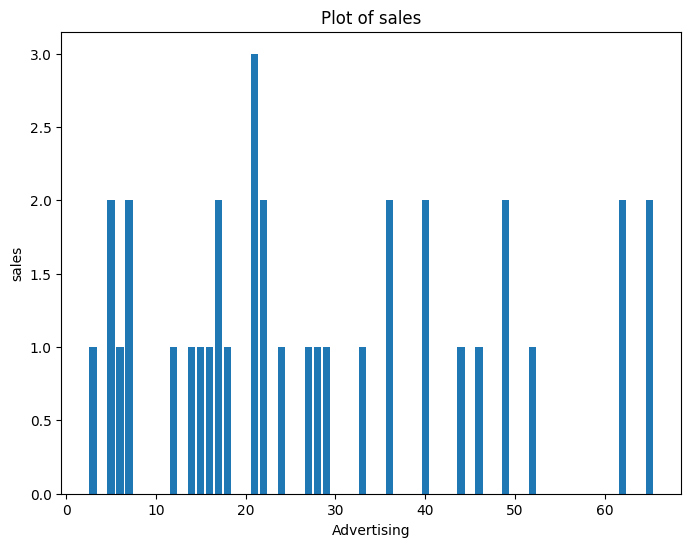

In [ ]:
# Univariant Analysis
# Assuming 'df' is your DataFrame
sales_counts = df['sales'].value_counts()

# Using Matplotlib to create a count plot
plt.figure(figsize=(8, 6))
plt.bar(sales_counts.index, sales_counts)
plt.title('Plot of sales')
plt.xlabel('Advertising')
plt.ylabel('sales')
plt.show()

In [ ]:
# 4. EXPLORATORY DATA ANALYSIS

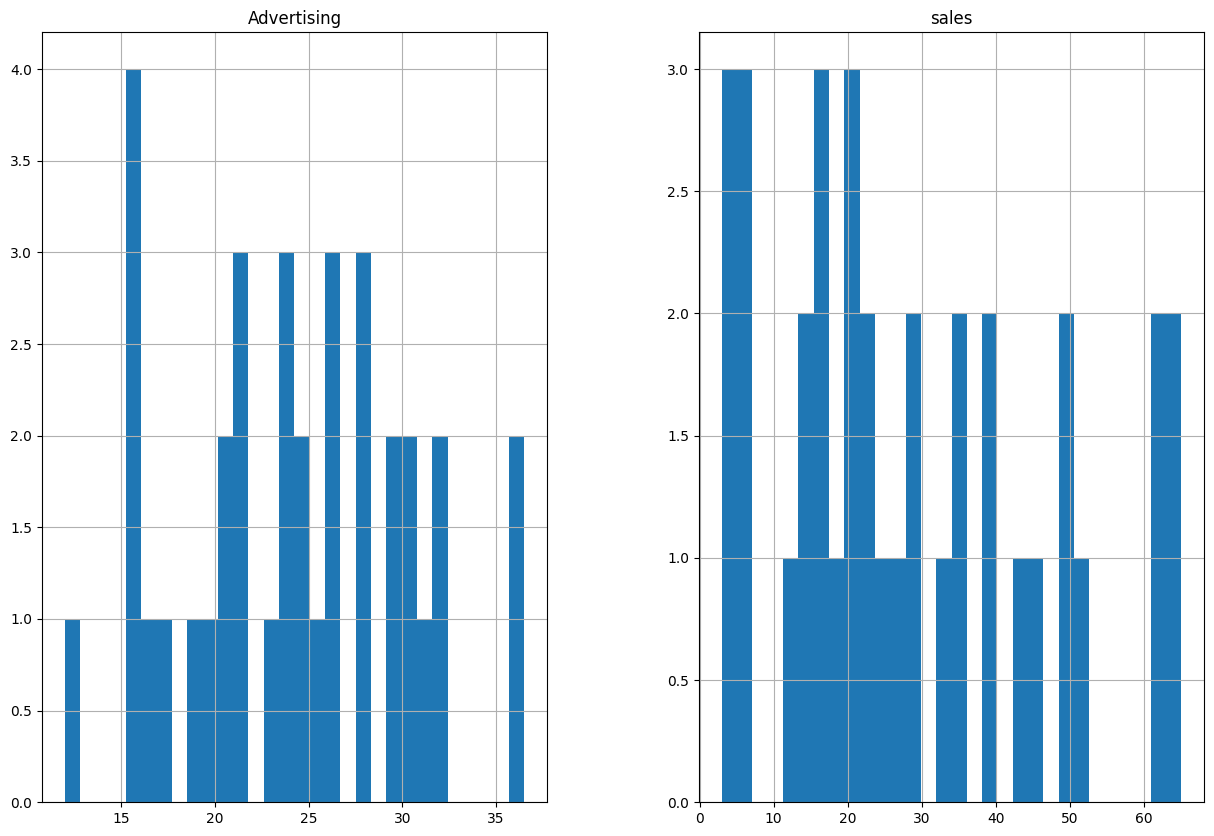

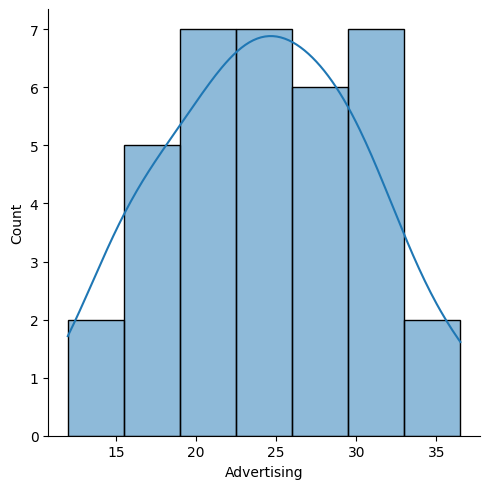

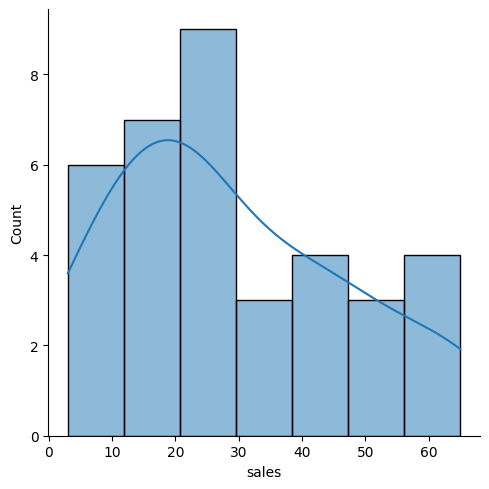

In [ ]:
# A. Data Distribution
# Histograms for numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Distribution plots for numerical features using Seaborn
for column in df.select_dtypes(include=[np.number]).columns:
    sns.displot(df[column], kde=True)
    plt.show()


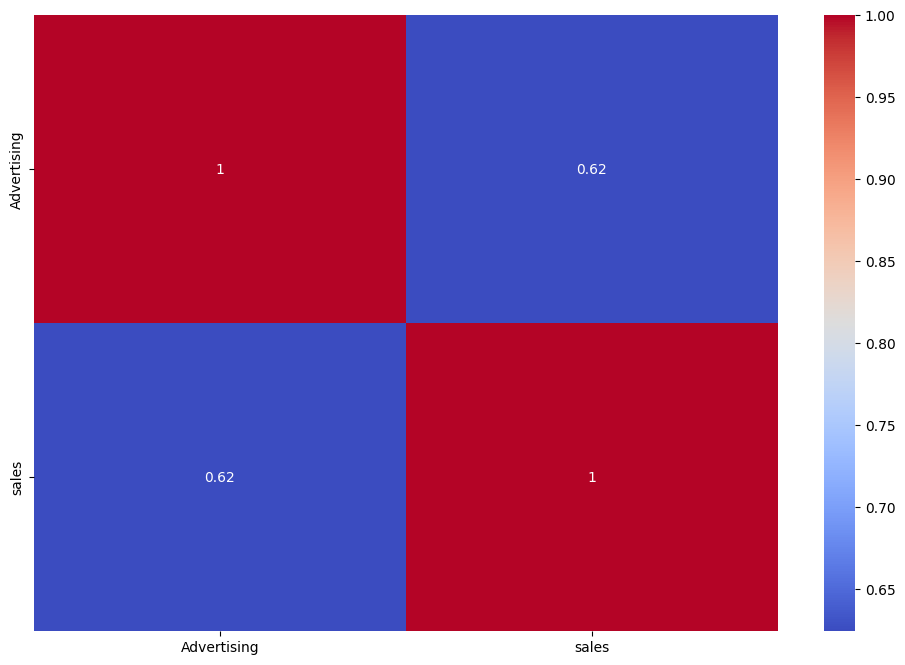

In [ ]:
# B.Corelation Analysis
# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# C. Categorical Feature Analysis
# Count plots for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

for column in categorical_cols:
    sns.countplot(x=sales, data=df)
    plt.show()


NameError: name 'df' is not defined

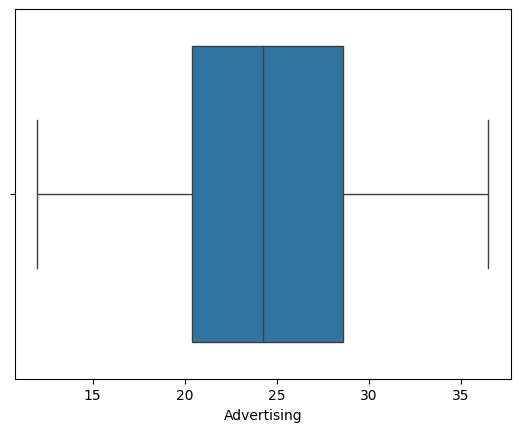

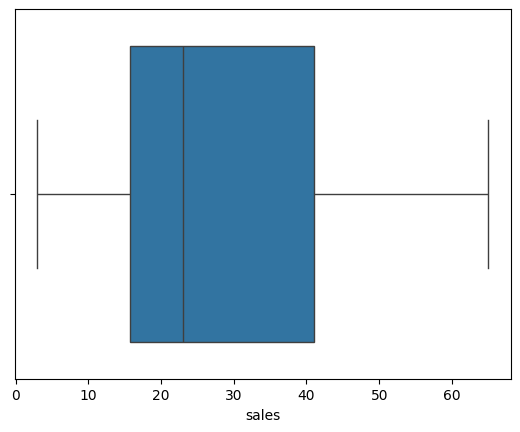

In [ ]:
# D. Boxplot for outliers
# Boxplots for numerical columns
for column in df.select_dtypes(include=[np.number]).columns:
    sns.boxplot(x=df[column])
    plt.show()


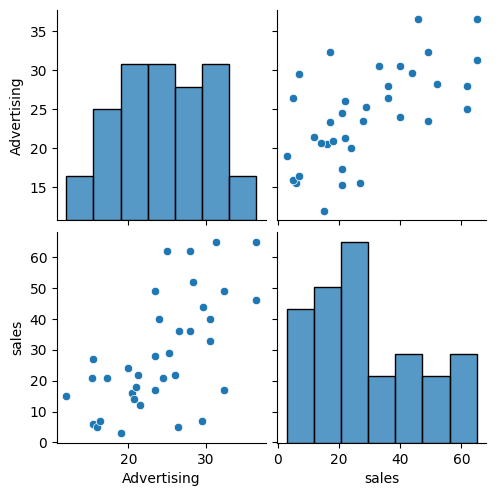

In [ ]:
# E.Pairplot for Feature Relationships
# Pairplot to see pairwise relationships between features
sns.pairplot(df)
plt.show()


In [ ]:
# 5. DEALING MISSING VALUES
# Check for missing data
print(df.isnull().sum())

# Fill missing values with mean (for numerical data) or mode (for categorical data)
df.fillna(df.mean(), inplace=True)

# Alternatively, you can drop missing values
df.dropna(inplace=True)


Advertising    0
sales          0
dtype: int64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 6. DATA TRANSFORMATION
from sklearn.preprocessing import StandardScaler

# Normalize numerical columns
scaler = StandardScaler()
df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))


In [ ]:
# 7. SAVING THE CLEANED DATA
df.to_csv('cleaned_data.csv', index=False)


In [ ]:
#Handle any missing values before declaring X and y
#Fill missing values with the mean for numerical columns
df.fillna(df.mean(), inplace=True)

In [ ]:
#Check for any outliers in the target variable
# We can plot a boxplot to visualize potential outliers
import seaborn as sns
import matplotlib.pyplot as plt

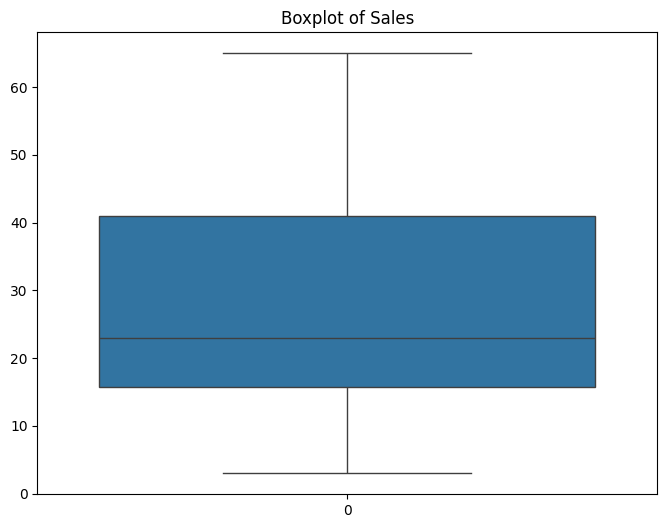

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y)
plt.title('Boxplot of Sales')
plt.show()

In [ ]:
# Standardization the feature variables have different scales
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print("\nFirst 5 rows of standardized feature (X_scaled):")
print(X_scaled[:5])

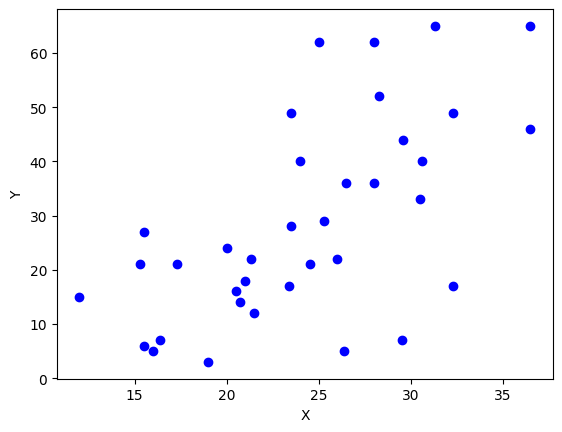

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = [12,20.5,21.0 ,15.5,15.3 ,23.5,24.5,21.3,23.5 ,28.0,24.0 ,15.5,17.3 ,25.3 ,25.0 ,36.5,36.5,29.6 ,30.5,28.0,26.0,21.5,20.0,19.0 ,16.0,20.7,26.5,30.6 ,32.3 ,29.5,28.3 ,31.3,32.3,26.4,23.4,16.4]
y = [15.0,16.0,18,27,21,49,21,22,28,36,40,6,21,29,62,65,46,44,33,62,22,12,24,3,5,14,36,40,49,7,52,65,17,5,17,7]

plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X,y, color = 'blue')

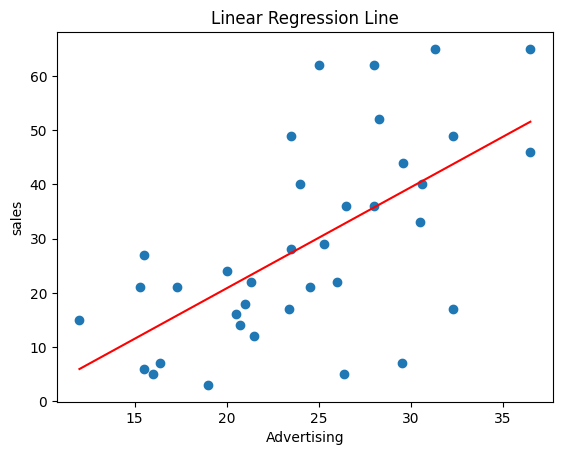

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
data = pd.read_csv('/content/b_batch.csv')

# Check for missing values and correct data types
data['sales'] = pd.to_numeric(data['sales'], errors='coerce')
data['Advertising'] = pd.to_numeric(data['Advertising'], errors='coerce')
data = data.dropna(subset=['sales', 'Advertising'])
# Declare feature and target variables
X = data['Advertising'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Generate predictions
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_range)

# Plot regression line
plt.scatter(X, y)
plt.plot(X_range, y_pred, color='red')
plt.xlabel('Advertising')
plt.ylabel('sales')
plt.title('Linear Regression Line')
plt.show()